In [1]:
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
include Fit
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

# Variables

In [2]:
prefix = "20160223_05_equil_fixI0"

input_no2 = "../DOAS/#{prefix}_NO2.csv"
input_nox = "../DOAS/#{prefix}_NOx.csv"

nil

# Data preparation

In [3]:
no2 = DataFrame.from_csv(input_no2)
no2.vectors = Index.new(no2.vectors.to_a.map{|i| i.to_sym})
no2.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.113743554326783,0.232172408985658,-4931518.35775241,2219983.37363723,0,1.31508412009397,0.156515655114652,-916.475444179052,2770.64592567436,2016-02-23T02:53:16+01:00
1,-0.0386850018224017,0.241097914048362,-4417585.27840795,2287892.11217135,1,1.24444742513687,0.161298272929796,-852.295391144336,2856.81981973735,2016-02-23T02:53:28+01:00
2,0.02593971067706,0.221605648340655,-6041868.46388503,2140981.21737893,2,1.34563850417166,0.150943761489043,-676.362409560025,2670.42867115014,2016-02-23T02:53:39+01:00
3,-0.0253869666156932,0.239279354274501,-5612626.90380304,2270779.31392252,3,1.21799703707657,0.160086583242518,-878.025730142929,2835.41614260125,2016-02-23T02:53:51+01:00
4,-0.0237975652169021,0.238268128916983,-5091589.75413632,2302464.47264965,4,1.41580105995882,0.162343192518283,-1062.06757398446,2871.78843277078,2016-02-23T02:54:02+01:00
5,0.0680343060778146,0.230044063772391,-5639950.35758027,2209950.52918428,5,1.34887851020324,0.155810439675929,-1383.20990517069,2757.33857856699,2016-02-23T02:54:13+01:00
6,-0.0510592355519044,0.243233377072397,-6320968.57766971,2337673.70111669,6,1.31259727697244,0.164807365495627,199.969139965399,2916.63177840715,2016-02-23T02:54:24+01:00
7,0.0605605626670847,0.226158708956415,-5924458.35353329,2199624.51564071,7,1.34111884489517,0.155070194817113,-599.49083903398,2742.52991941816,2016-02-23T02:54:35+01:00
8,-0.160040410429753,0.220722032454694,-4500978.54179437,2126022.28305652,8,1.25781576295,0.149874074009746,-503.871723425154,2652.21445519684,2016-02-23T02:54:46+01:00
9,0.0269735123530808,0.239307987233709,-4603475.59002595,2270851.39590885,9,1.21859756257814,0.160091345303953,-736.882362064832,2835.56362696144,2016-02-23T02:54:58+01:00


In [4]:
nox = DataFrame.from_csv(input_nox)
nox.vectors = Index.new(nox.vectors.to_a.map{|i| i.to_sym})
nox.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.388847923194718,0.264064522607641,-4919704.39483084,2522213.05739082,59,17.931459264434,0.181867810534537,787.032002553261,3146.23664640334,2016-02-23T03:04:25+01:00
1,0.243535698393906,0.265897158978487,-4761045.51533936,2536680.90904085,60,27.0829810501995,0.185555396938313,1867.1958277229,3163.40148325165,2016-02-23T03:04:35+01:00
2,0.302675047656893,0.274252920123371,-5492331.62054367,2615017.67282499,61,27.1715773291329,0.191418075624045,2382.20536552614,3261.15460663981,2016-02-23T03:04:45+01:00
3,0.280348895165571,0.251933721943187,-3608879.92199035,2402389.22655351,62,27.1146928343851,0.175838219903687,2045.4644238909,2995.99450879335,2016-02-23T03:04:55+01:00
4,0.281531258011507,0.26428113551551,-3817275.05130711,2518696.81768432,63,27.2403582689578,0.18438876169658,2358.46751899311,3141.10242645744,2016-02-23T03:05:06+01:00
5,0.247376660820131,0.274227503611832,-4463163.31069395,2612273.18160115,64,27.1987208094157,0.191228655101789,1819.67892713598,3257.91419228568,2016-02-23T03:05:16+01:00
6,0.266525701030188,0.265108012753407,-5365630.61874613,2527877.86105959,65,27.1651900499092,0.185038004492118,2495.196919471,3152.44944032158,2016-02-23T03:05:26+01:00
7,0.218595448199552,0.275071609083659,-4237704.87592472,2623591.64035313,66,27.1817186911148,0.192047801548904,2173.32180755444,3271.75343084792,2016-02-23T03:05:36+01:00
8,0.0859224462491369,0.265070905568958,-3661806.29149212,2525808.81208967,67,27.1512265901232,0.184883290361414,1738.740625168,3150.03638894897,2016-02-23T03:05:47+01:00
9,0.346149559776061,0.266853215706635,-3566532.67740037,2545091.06779565,68,27.1703609203451,0.186297972392924,1527.41282714613,3173.8903116544,2016-02-23T03:05:57+01:00


In [5]:
ts = no2.concat(nox)
ts.sort([:timestamp])

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.113743554326783,0.232172408985658,-4931518.35775241,2219983.37363723,0,1.31508412009397,0.156515655114652,-916.475444179052,2770.64592567436,2016-02-23T02:53:16+01:00
1,-0.0386850018224017,0.241097914048362,-4417585.27840795,2287892.11217135,1,1.24444742513687,0.161298272929796,-852.295391144336,2856.81981973735,2016-02-23T02:53:28+01:00
2,0.02593971067706,0.221605648340655,-6041868.46388503,2140981.21737893,2,1.34563850417166,0.150943761489043,-676.362409560025,2670.42867115014,2016-02-23T02:53:39+01:00
3,-0.0253869666156932,0.239279354274501,-5612626.90380304,2270779.31392252,3,1.21799703707657,0.160086583242518,-878.025730142929,2835.41614260125,2016-02-23T02:53:51+01:00
4,-0.0237975652169021,0.238268128916983,-5091589.75413632,2302464.47264965,4,1.41580105995882,0.162343192518283,-1062.06757398446,2871.78843277078,2016-02-23T02:54:02+01:00
5,0.0680343060778146,0.230044063772391,-5639950.35758027,2209950.52918428,5,1.34887851020324,0.155810439675929,-1383.20990517069,2757.33857856699,2016-02-23T02:54:13+01:00
6,-0.0510592355519044,0.243233377072397,-6320968.57766971,2337673.70111669,6,1.31259727697244,0.164807365495627,199.969139965399,2916.63177840715,2016-02-23T02:54:24+01:00
7,0.0605605626670847,0.226158708956415,-5924458.35353329,2199624.51564071,7,1.34111884489517,0.155070194817113,-599.49083903398,2742.52991941816,2016-02-23T02:54:35+01:00
8,-0.160040410429753,0.220722032454694,-4500978.54179437,2126022.28305652,8,1.25781576295,0.149874074009746,-503.871723425154,2652.21445519684,2016-02-23T02:54:46+01:00
9,0.0269735123530808,0.239307987233709,-4603475.59002595,2270851.39590885,9,1.21859756257814,0.160091345303953,-736.882362064832,2835.56362696144,2016-02-23T02:54:58+01:00


In [6]:
ts[:timestamp].head

#<Daru::Vector:24943500 @name = nil @size = 10 >
                                      nil
                   0 2016-02-23T02:53:16+
                   1 2016-02-23T02:53:28+
                   2 2016-02-23T02:53:39+
                   3 2016-02-23T02:53:51+
                   4 2016-02-23T02:54:02+
                   5 2016-02-23T02:54:13+
                   6 2016-02-23T02:54:24+
                   7 2016-02-23T02:54:35+
                   8 2016-02-23T02:54:46+
                   9 2016-02-23T02:54:58+

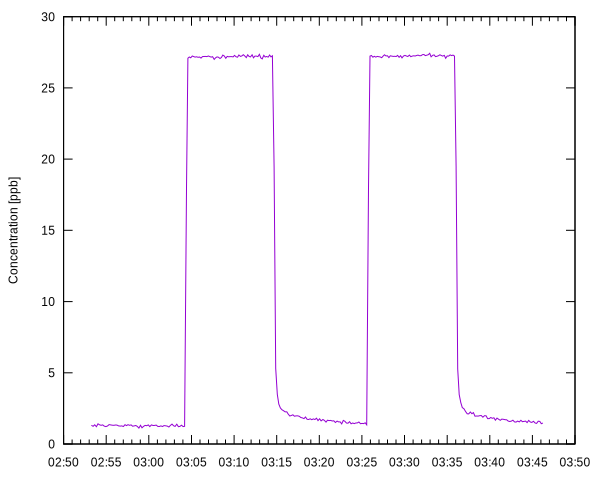

In [7]:
ts.index = DateTimeIndex.new(ts[:timestamp])

Plot.new(
  [ts[:no2], with: "lines", title: ""],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

In [8]:
offset = ts[:timestamp].first

ts[:s] = ts[:timestamp].collect do |t|
  (t - offset).to_f*24*60*60
end
ts.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s
2016-02-23T02:53:16+01:00,0.113743554326783,0.232172408985658,-4931518.35775241,2219983.37363723,0,1.31508412009397,0.156515655114652,-916.475444179052,2770.64592567436,2016-02-23T02:53:16+01:00,0.0
2016-02-23T02:53:28+01:00,-0.0386850018224017,0.241097914048362,-4417585.27840795,2287892.11217135,1,1.24444742513687,0.161298272929796,-852.295391144336,2856.81981973735,2016-02-23T02:53:28+01:00,11.999999999999998
2016-02-23T02:53:39+01:00,0.02593971067706,0.221605648340655,-6041868.46388503,2140981.21737893,2,1.34563850417166,0.150943761489043,-676.362409560025,2670.42867115014,2016-02-23T02:53:39+01:00,23.0
2016-02-23T02:53:51+01:00,-0.0253869666156932,0.239279354274501,-5612626.90380304,2270779.31392252,3,1.21799703707657,0.160086583242518,-878.025730142929,2835.41614260125,2016-02-23T02:53:51+01:00,35.0
2016-02-23T02:54:02+01:00,-0.0237975652169021,0.238268128916983,-5091589.75413632,2302464.47264965,4,1.41580105995882,0.162343192518283,-1062.06757398446,2871.78843277078,2016-02-23T02:54:02+01:00,46.0
2016-02-23T02:54:13+01:00,0.0680343060778146,0.230044063772391,-5639950.35758027,2209950.52918428,5,1.34887851020324,0.155810439675929,-1383.20990517069,2757.33857856699,2016-02-23T02:54:13+01:00,57.00000000000001
2016-02-23T02:54:24+01:00,-0.0510592355519044,0.243233377072397,-6320968.57766971,2337673.70111669,6,1.31259727697244,0.164807365495627,199.969139965399,2916.63177840715,2016-02-23T02:54:24+01:00,68.0
2016-02-23T02:54:35+01:00,0.0605605626670847,0.226158708956415,-5924458.35353329,2199624.51564071,7,1.34111884489517,0.155070194817113,-599.49083903398,2742.52991941816,2016-02-23T02:54:35+01:00,79.0
2016-02-23T02:54:46+01:00,-0.160040410429753,0.220722032454694,-4500978.54179437,2126022.28305652,8,1.25781576295,0.149874074009746,-503.871723425154,2652.21445519684,2016-02-23T02:54:46+01:00,90.0
2016-02-23T02:54:58+01:00,0.0269735123530808,0.239307987233709,-4603475.59002595,2270851.39590885,9,1.21859756257814,0.160091345303953,-736.882362064832,2835.56362696144,2016-02-23T02:54:58+01:00,102.00000000000001


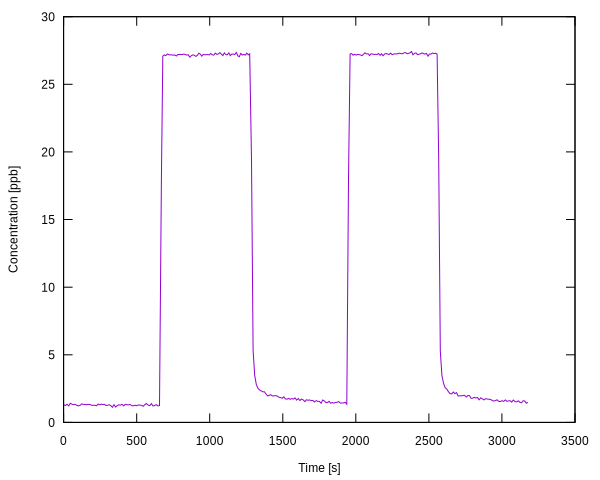

In [9]:


Plot.new(
  [ts[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [10]:
ts.index = Index.new((0..(ts.nrows - 1)).to_a)

ts.each_row_with_index do |row,i|
  if i+1 < ts.nrows and (row[:no2] - ts.row[i+1][:no2]).abs > 5
    puts i
    puts row[:no2]
  end 
end
nil

59
1.24563327495726
60
17.931459264434
119
27.2559849567199
120
19.4123827082074
179
1.34638016633166
180
17.9583218575922
239
27.2344263206118
240
19.4668687423452


In [35]:
ts_fit = ts.row[119..178]
offset = ts_fit[:s].first
ts_fit[:s] = ts_fit[:s] - offset
ts_fit.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s,o3_mean,no2_scaled
119,0.363466993475913,0.256995470376284,-3378684.78267151,2451022.60803737,118,27.2559849567199,0.179437259059315,2227.11114952265,3056.56594478143,2016-02-23T03:14:30+01:00,0.0,1960.005053682203,2725.59849567199
120,0.265057536560086,0.260809653274478,-4939524.35227506,2489665.52755314,60,19.4123827082074,0.179911665439405,856.403060957879,3105.53174481697,2016-02-23T03:14:42+01:00,12.0,1863.261580678332,1941.23827082074
121,0.180021145186182,0.232735781660141,-5322822.63106876,2222095.61890551,61,5.31000695196032,0.157508805457236,-1056.01866920496,2773.17375188123,2016-02-23T03:14:53+01:00,23.0,1572.204259123227,531.000695196032
122,0.140978154133809,0.250753028436545,-4497551.93528405,2401311.21854797,62,3.48596616879266,0.169776227060713,-463.902607477322,2996.46190709124,2016-02-23T03:15:04+01:00,34.0,1308.8088545958838,348.59661687926604
123,0.0685126892196743,0.2233565925872,-3920550.01940537,2135342.99157022,63,2.79934834164823,0.150837466146236,-127.793161549725,2664.92242486881,2016-02-23T03:15:15+01:00,45.0,1091.3130797040822,279.934834164823
124,0.153084944519915,0.241482803588421,-4278238.2410904,2323227.79162599,64,2.52713135862061,0.164044820554422,74.4482722192225,2898.28979033993,2016-02-23T03:15:26+01:00,56.0,870.5343591750194,252.713135862061
125,-0.010748944185635,0.22863375971774,-6051174.92982278,2169186.84645116,65,2.40619351124848,0.153158242733568,-161.077648859241,2708.55883193784,2016-02-23T03:15:37+01:00,67.0,598.5140761673914,240.619351124848
126,0.07507258529177,0.249958455232955,-4802777.58915183,2407653.02196755,66,2.33543941967484,0.16996248303926,-378.278596836232,3003.47256438728,2016-02-23T03:15:48+01:00,78.0,416.82306284757806,233.543941967484
127,0.141178808063088,0.238454047306461,-3447042.22980208,2280227.69910943,67,2.26123929744321,0.160959524585538,-1068.28600670125,2845.69363678091,2016-02-23T03:15:59+01:00,89.0,112.02289951545416,226.12392974432098
128,0.0427773023992216,0.230838600772058,-5515348.31275289,2216527.94155525,68,2.26084365444084,0.156457852845418,-507.012510564415,2765.54060768233,2016-02-23T03:16:11+01:00,101.0,-60.44067184933935,226.084365444084


In [36]:
plot_fit = Plot.new(
  [ts_fit[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")
nil

In [41]:
fit = fit(ts_fit[:s,:no2], function: "a + c*x + b*exp(-x/t)", initials: {a: 1.5, b: 24, t: 14, c: -0.0001}, using: "2:3")
fit[:formula_ds].data

" 1.91097 + -0.000693807*x + 26.5791*exp(-x/16.3969) "

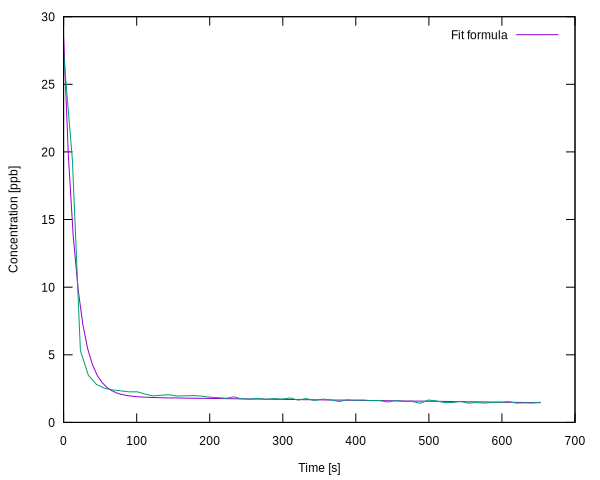

In [42]:
plot_fit << fit[:formula_ds]

In [44]:
ts_fit2 = ts.row[239..(ts.nrows - 1)]
ts_fit2[:s] = ts_fit2[:s] - ts_fit2[:s].first
plot_fit2 = Plot.new(
  [ts_fit2[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")
nil

In [45]:
fit2= fit(ts_fit2[:s,:no2], function: "a + c*x + b*exp(-x/t)", initials: {a: 1, b: 25, t: 60*10, c: -0.001}, using: "2:3")
fit2[:formula_ds].data

" 1.96351 + -0.000738518*x + 26.4959*exp(-x/15.5159) "

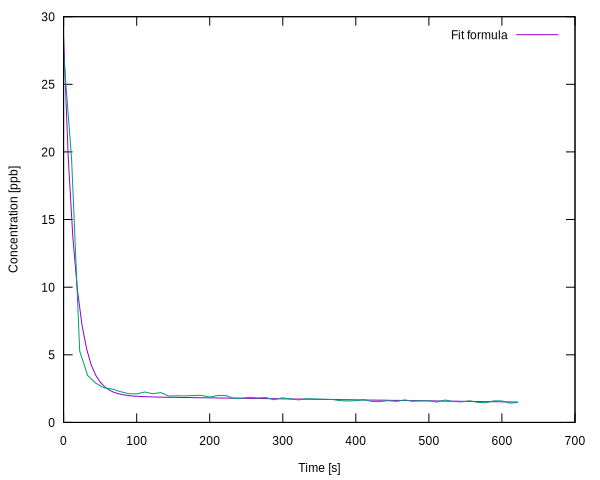

In [46]:
plot_fit2 << fit2[:formula_ds]

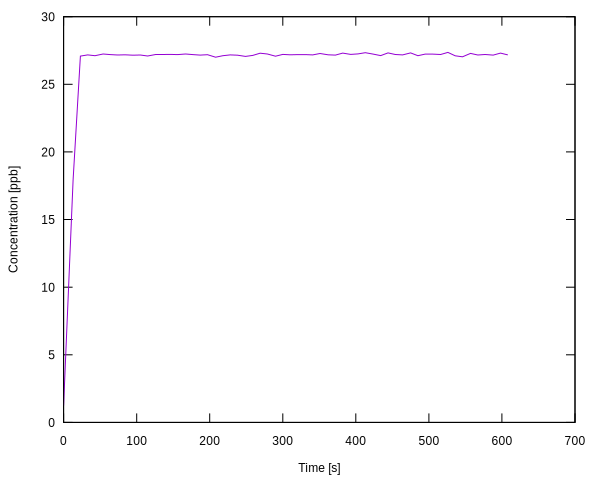

In [47]:
ts_fit3 = ts.row[59..118]
ts_fit3[:s] -= ts_fit3[:s].first
plot_fit3 = Plot.new(
  [ts_fit3[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [48]:
fit3 = fit(ts_fit3[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit3[:formula_ds].data

" 27.2348 + -26.2552*exp(-x/10.1024) "

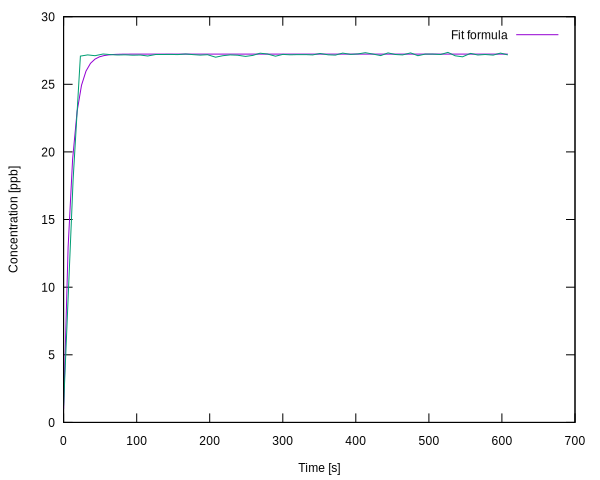

In [49]:
plot_fit3 << fit3[:formula_ds]

In [50]:
ts_fit4 = ts.row[179..238]
ts_fit4[:s] -= ts_fit4[:s].first
plot_fit4 = Plot.new(
  [ts_fit4[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")
nil

In [51]:
fit4 = fit(ts_fit4[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit4[:formula_ds].data

" 27.2838 + -26.1939*exp(-x/9.66829) "

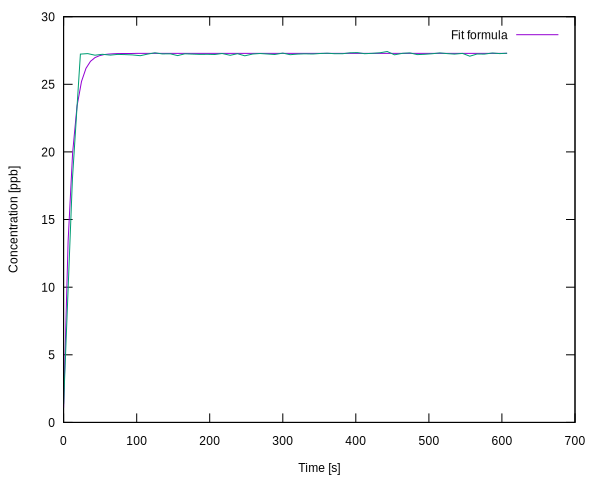

In [52]:
plot_fit4 << fit4[:formula_ds]

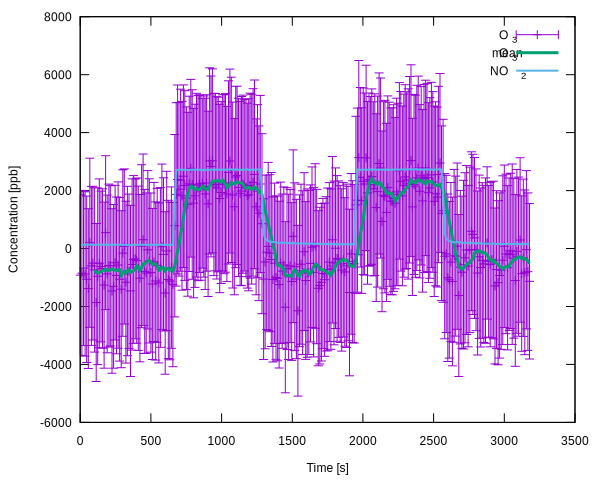

In [24]:
ts[:o3_mean] = ts[:o3].rolling_mean
ts[:no2_scaled] = ts[:no2]*100
Plot.new(
  [ts[:s, :o3, :o3_err], using: "2:3:4", with: "yerrorbars", title: "O_3"],
  [ts[:s, :o3_mean], using: "2:3", with: "lines", title: "O_3 mean", lw: "3"],
  [ts[:s, :no2_scaled], using: "2:3", with: "lines", title: "NO_2", lw: "2"],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [25]:
fit4[:deltas]

{:a=>71310000000.0, :b=>71310000000.0, :t=>1245000000000.0}

In [26]:
fit4[:coefficients]

{:a=>2106660.0, :b=>-2106660.0, :t=>36729000.0}